In [1]:
from PIL import Image
import numpy as np
import torch

In [2]:
im = Image.open( './2_1_2_170_2.jpg')
im_arr = np.asarray(im)

In [3]:
im_arr

array([[[162, 148, 109],
        [163, 149, 110],
        [162, 148, 109],
        ...,
        [ 45,  41,  40],
        [ 47,  43,  40],
        [ 42,  38,  35]],

       [[160, 146, 107],
        [162, 148, 109],
        [162, 148, 109],
        ...,
        [ 54,  50,  49],
        [ 55,  51,  48],
        [ 53,  49,  46]],

       [[158, 144, 105],
        [160, 146, 107],
        [161, 147, 108],
        ...,
        [ 44,  40,  39],
        [ 43,  39,  36],
        [ 45,  41,  38]],

       ...,

       [[ 86,  76,  67],
        [ 86,  76,  67],
        [ 86,  76,  67],
        ...,
        [135, 128,  86],
        [131, 124,  82],
        [127, 120,  78]],

       [[ 87,  77,  68],
        [ 87,  77,  68],
        [ 87,  77,  68],
        ...,
        [132, 125,  83],
        [131, 124,  82],
        [129, 122,  80]],

       [[ 87,  77,  68],
        [ 87,  77,  68],
        [ 87,  77,  68],
        ...,
        [129, 122,  80],
        [132, 125,  83],
        [132, 125,  83]]

In [4]:
img_tensor=torch.tensor(im_arr)

In [5]:
def noise(img_tensor, noise_tensor, a, y_tensor):
    result_tensor=a*img_tensor+(1-a)*noise_tensor+y_tensor
    return result_tensor

In [6]:
y_tensor=torch.ones(480,640,3)

In [7]:
noise_tensor_night=torch.ones(480,640,3)-1

In [8]:
noise_tensor_day=torch.ones(480,640,3)*255

In [9]:
result_tensor = noise(img_tensor,noise_tensor_night,0.1,y_tensor)

In [ ]:
img =Image.fromarray(np.array(result_tensor).astype('uint8'))

In [16]:
img =Image.fromarray(np.array(noise_tensor_night).astype('uint8'))
img.save('./1_1.jpg')

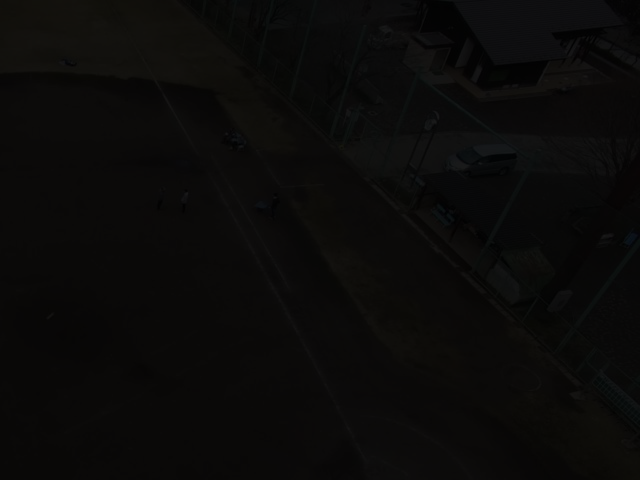

In [11]:
img

In [58]:
img.save('./train_1_1_1_186_night.jpg')

In [12]:
result_tensor = noise(img_tensor,noise_tensor_day,0.3,y_tensor)
img =Image.fromarray(np.array(result_tensor).astype('uint8'))

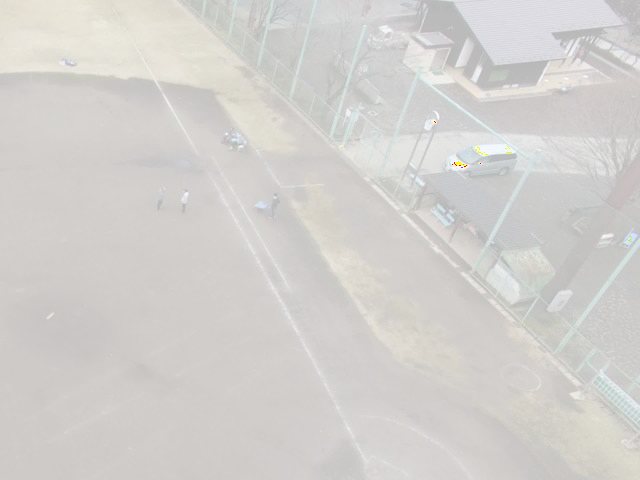

In [13]:
img

In [14]:
img.save('2.jpg')

In [17]:
img =Image.fromarray(np.array(noise_tensor_day).astype('uint8'))
img.save('./2_1.jpg')

In [18]:
cloud = Image.open( './perlinMap_1_1.png')
cloud_arr = np.asarray(cloud).astype(float)
cloud_tensor=torch.tensor(cloud_arr)

In [72]:
img_tensor.size()

torch.Size([720, 1280, 3])

In [97]:
cloud_tensor.sequeeze().size()

AttributeError: 'Tensor' object has no attribute 'sequeeze'

In [24]:
img_tensor=torch.tensor(im_arr)

In [27]:
#cloud_tensor=cloud_tensor.repeat(2,2,1)[0:720,0:1280,:]
cloud_tensor=torch.nn.functional.interpolate(cloud_tensor.permute(2,0,1).unsqueeze(0),(480,640))
cloud_tensor= torch.squeeze(cloud_tensor).permute(1,2,0)


In [28]:
result_tensor = noise(img_tensor,cloud_tensor,0.3,y_tensor)
img =Image.fromarray(np.array(result_tensor).astype('uint8'))
img.save('./3.jpg')

In [29]:
img =Image.fromarray(np.array(cloud_tensor).astype('uint8'))
img.save('./3_1.jpg')

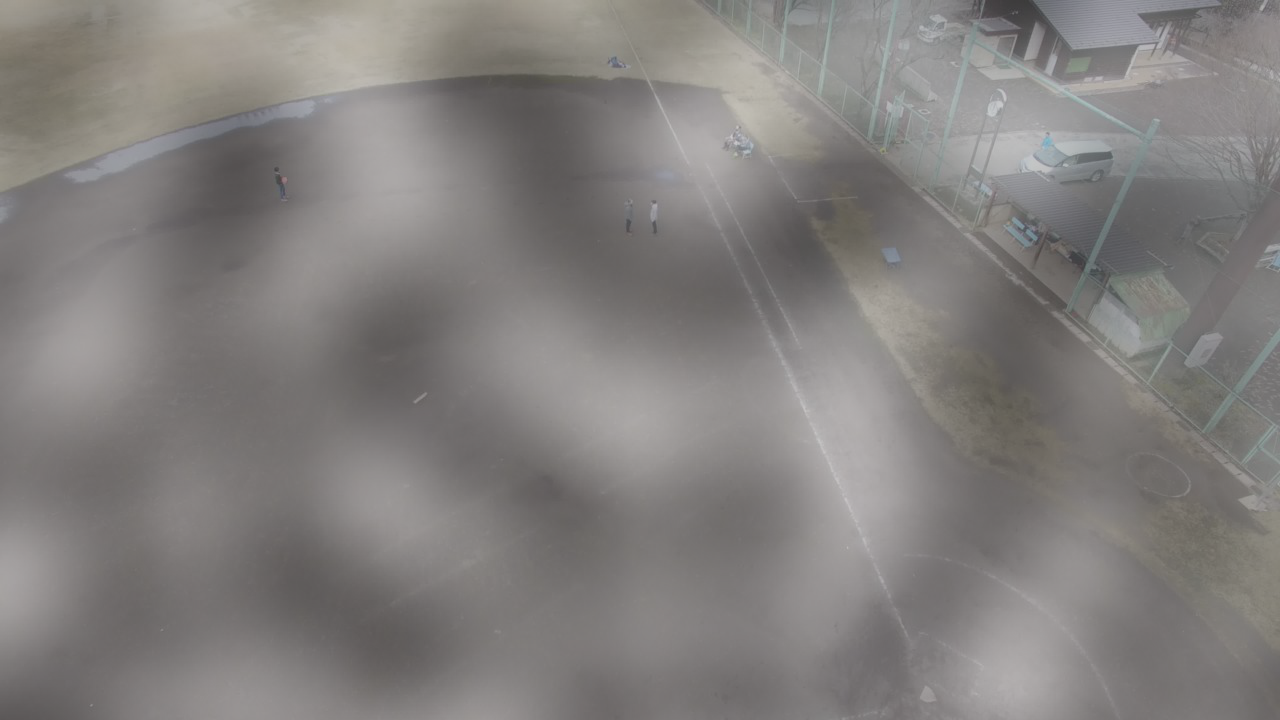

In [109]:
img

In [ ]:
fog = Image.open( './perlinMap_4_4.png')
fog_arr = np.asarray(fog).astype(float)
fog_tensor=torch.tensor(fog_arr)
fog_tensor=torch.nn.functional.interpolate(fog_tensor.permute(2,0,1).unsqueeze(0),(480,640))
fog_tensor= torch.squeeze(fog_tensor).permute(1,2,0)

In [ ]:
result_tensor = noise(img_tensor,fog_tensor,0.3,y_tensor)
img =Image.fromarray(np.array(result_tensor).astype('uint8'))
img.save('./4.jpg')

In [ ]:
img =Image.fromarray(np.array(fog_tensor).astype('uint8'))
img.save('./4_1.jpg')

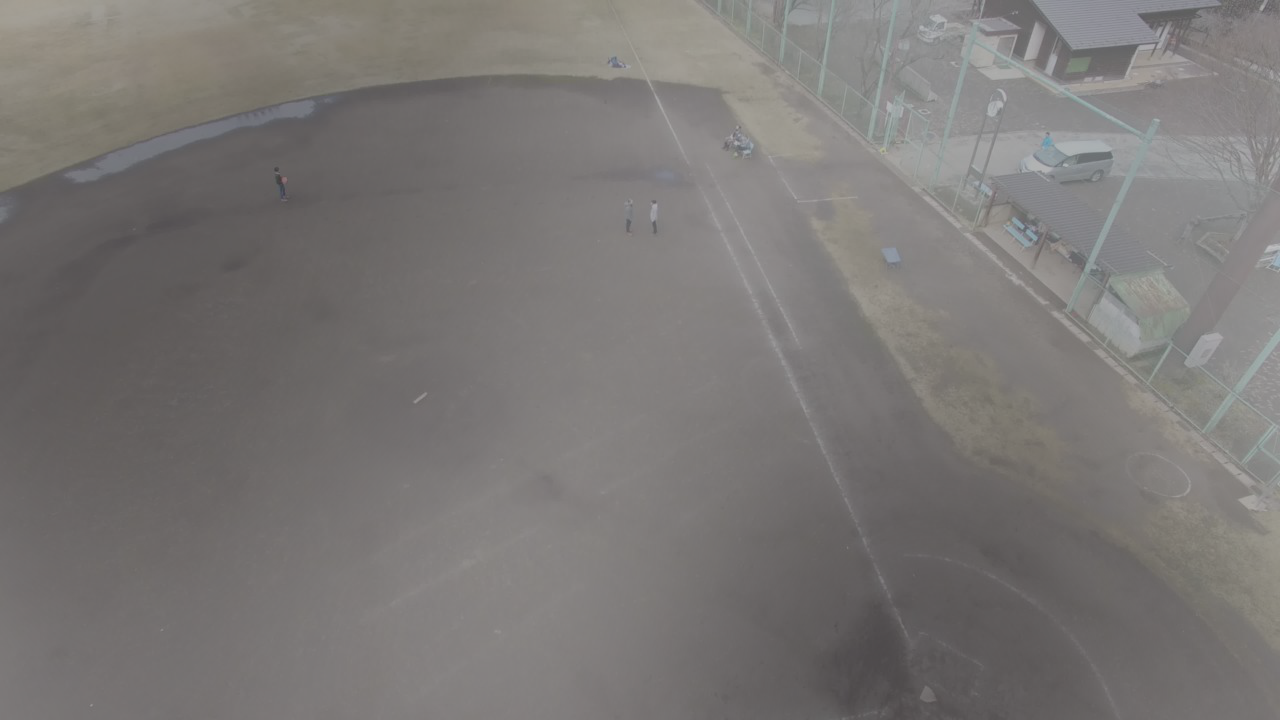

In [114]:
img